# **Cars 4 You | Machine Learning Project**

### **Import Libraries**

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier

---

### **Import Data**

In [285]:
df = pd.read_csv('../data/train.csv')

---

### **Data Understanding**

In [286]:
df.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [287]:
df.describe(include='all')

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.000000,74452,74456,74482.000000,75973.000000,74451,74510.000000,74462,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
unique,NaN,72,735,NaN,NaN,40,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ford,Focus,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,14808,6353,NaN,NaN,38050,NaN,37995,NaN,NaN,NaN,NaN,NaN,NaN
mean,37986.000000,NaN,NaN,2017.096611,16881.889553,NaN,23004.184088,NaN,120.329078,55.152666,1.660136,64.590667,1.994580,0.0
std,21931.660338,NaN,NaN,2.208704,9736.926322,NaN,22129.788366,NaN,65.521176,16.497837,0.573462,21.021065,1.472981,0.0
min,0.000000,NaN,NaN,1970.000000,450.000000,NaN,-58540.574478,NaN,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,18993.000000,NaN,NaN,2016.000000,10200.000000,NaN,7423.250000,NaN,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,37986.000000,NaN,NaN,2017.000000,14699.000000,NaN,17300.000000,NaN,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,56979.000000,NaN,NaN,2019.000000,20950.000000,NaN,32427.500000,NaN,145.000000,62.800000,2.000000,82.000000,3.000000,0.0


In [288]:
df[df['carID'].isin([13216, 10656,8309,12824])]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
13162,10656,bmw,1 Series,2020.0,26495,Semi-Auto,10.0,Petrol,145.0,42.8,1.5,77.0,3.0,0.0
13692,12824,BMW,1 Series,2016.0,12995,SEMI-AUTO,33291.0,Diesel,20.0,67.3,2.0,90.0,0.0,0.0
14094,8309,BMW,1 Series,2016.0,9899,Manual,47325.0,Diesel,0.0,83.1,1.5,45.0,1.0,0.0
14327,13216,BMW,1 Series,2016.0,12998,Semi-Auto,31879.0,Diesel,0.0,78.5,1.5,69.0,2.0,0.0


#### **Data Quality**
- **Price**: we have outliers, since we have a really big jump from the 4th Quartile and the Max value and we have a slightly left skewed distribution
- **Mileage**: we have outliers, since we have a really big jump from the 4th Quartile and the Max value and we have a left skewed distribution, we also have negative values, so we need to handle these values
- **Tax**: we have negative values, we need to investigate why these values are negative and If they make any sense in this context
- **MPG**: We have negative values, we need to handle these values
- **Engine Size**: We have negative values, needing to handle them
- **PaintQuality%**: We have values above 100%, we need to check this cases and see if they make any kind of sense
- **previousOwners**: We have negative and float values, we need to handle this cases as well
- **hasDamage**: Seems like a constant value feature, we need to check if thats the case


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


---

## **Data Consistency**

In [290]:
df.rename(columns={'carID':'car_id', 'Brand':'brand', 'engineSize':'engine_size', 'paintQuality%':'paint_quality', 
                   'previousOwners':'previous_owners', 'hasDamage':'has_damage', 'fuelType':'fuel_type'}, inplace=True)

In [291]:
#We noticed that some values of paintQuality% are higher than 100%, so we decided to assume that it's value is 100%
df.loc[df['paint_quality'] > 100, 'paint_quality'] = 100

In [292]:
##df['model'].unique()

In [293]:
# We have a lot of mistypes in categorical columns

In [294]:
#DecisionTreeClassifier?

In [295]:
#Decision tree 
# List of columns that have categories
cat_cols = ['brand', 'model', 'transmission', 'fuel_type']

# Make sure all these columns are treated as categorical
for col in cat_cols:
    df[col] = df[col].astype('category')

# Fill missing values using decision tree
for col in cat_cols:
    # Use other columns as input features
    features = [c for c in cat_cols if c != col]
    
    # Separate rows with and without missing values
    train_data = df[df[col].notna()]
    missing_data = df[df[col].isna()]
    
    if missing_data.empty:
        continue  # skip if nothing is missing
    
    # Convert categories to numbers
    X_train = train_data[features].apply(lambda x: x.cat.codes)
    y_train = train_data[col]
    X_missing = missing_data[features].apply(lambda x: x.cat.codes)
    
    # Train the model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    
    # Fill in the missing values
    df.loc[df[col].isna(), col] = model.predict(X_missing)

In [296]:
def simple_similarity(a, b):
    a, b = a.lower(), b.lower()
    set_a, set_b = set(a), set(b)
    overlap = len(set_a & set_b)
    return overlap / max(len(set_a | set_b), 1)

def closest_match(value, reference_list, cutoff=0.4):
    if pd.isna(value) or value.strip() == "" or value.lower() == 'nan':
        return np.nan
    if value in reference_list:
        return value

    best = max(reference_list, key=lambda ref: simple_similarity(value, ref))
    score = simple_similarity(value, best)
    len_diff = abs(len(value) - len(best))

    # ✅ Only correct if similarity is strong *and* lengths are close
    if score >= cutoff and len_diff <= 2:
        return best
    return value


# --- Clean & correct non-missing data ---
cat_cols = ['brand', 'model', 'transmission', 'fuel_type']

# Convert to string (avoid categorical assignment errors)
for col in cat_cols:
    df[col] = df[col].astype(str).str.lower()
    df.loc[df[col].isin(['nan', 'none', '']), col] = np.nan  # normalize blanks

# Apply corrections only to existing (non-missing) entries
df.loc[df['brand'].notna(), 'brand'] = df.loc[df['brand'].notna(), 'brand'].apply(lambda x: closest_match(x, known_brands))
df.loc[df['transmission'].notna(), 'transmission'] = df.loc[df['transmission'].notna(), 'transmission'].apply(lambda x: closest_match(x, known_transmissions))
df.loc[df['fuel_type'].notna(), 'fuel_type'] = df.loc[df['fuel_type'].notna(), 'fuel_type'].apply(lambda x: closest_match(x, known_fuel_types))
df.loc[df['model'].notna(), 'model'] = df.loc[df['model'].notna(), 'model'].apply(lambda x: closest_match(x, known_model))

# Convert back to categorical (optional, after cleaning)
for col in cat_cols:
    df[col] = df[col].astype('category')

In [297]:
df['model'].unique()

['golf', 'yaris', 'q2', 'fiesta', '2 series', ..., 'sl', ' i', ' m6', 'm5', ' terracan']
Length: 192
Categories (192, object): [' a', ' accent', ' c-h', ' caddy life', ..., 'z3', 'z4', 'zafira', 'zafira tourer']

In [298]:
df['brand'].unique()

['vw', 'toyota', 'audi', 'ford', 'bmw', 'skoda', 'opel', 'mercedes', 'hyundai']
Categories (9, object): ['audi', 'bmw', 'ford', 'hyundai', ..., 'opel', 'skoda', 'toyota', 'vw']

In [299]:
df['fuel_type'].unique()

['petrol', 'diesel', 'hybrid', 'other', 'electric']
Categories (5, object): ['diesel', 'electric', 'hybrid', 'other', 'petrol']

In [300]:
df['transmission'].unique()

['semi-auto', 'manual', 'automatic', 'unknown', 'other']
Categories (5, object): ['automatic', 'manual', 'other', 'semi-auto', 'unknown']

## **Data Cleaning**

### **Duplicates**

In [301]:
# check for duplicates in car ID
df['car_id'].nunique() == df.shape[0]

True

In [302]:
# check for duplicate rows
df.duplicated().sum()

np.int64(0)

#### **Negative Values**

For negative values, we applied the absolute value function to each column.

In [303]:
columns_negative= ["previous_owners","mileage","mpg","engine_size","tax"]

# Apply abs function to each column in columns_negative
for col in columns_negative:
    df[col] = df[col].abs()

#### **Constant Value Features**

In [304]:
# check for constant values features
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print(f'Constant features: {constant_features}')

Constant features: ['has_damage']


Since hasDamage is a constant feature, we can safely remove it since theres no meaning if its keeped

In [305]:
df= df.drop(columns='has_damage')

#### **Missing Values**

First, lets check if we have any entries with every feature missing

In [306]:
# create a mask for rows where all columns except 'carID' and 'price' are NaN
mask = df.drop(columns=['car_id', 'price']).isna().all(axis=1)
df_missing_rows = df[mask]

df_missing_rows.size

0

We don't have any row that is completely null

##### **Percentages of missing values for each column**

In [307]:
# check the percentage of missing values for each column
missing_percent = df.isna().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
df_missing_percent = pd.DataFrame({'column': missing_percent.index, 'missing_percent': missing_percent.values})
df_missing_percent

,column,missing_percent
0,mpg,10.432654
1,tax,10.403696
2,previous_owners,2.040198
3,paint_quality,2.005976
4,engine_size,1.995446
5,year,1.962539
6,mileage,1.925684


We have some percentage of missing values but nothing too bad.

#### **Filling Missing Values in Numeric Features**

For the numeric features, we will use KNN imputation with the 5 nearest neighbors and just set the weights to 'uniform'.

In [308]:
num_cols = ['year', 'mileage', 'tax', 'mpg', 'engine_size', 'paint_quality', 'previous_owners']

In [309]:
# store mean and std
means = df[num_cols].mean()
stds = df[num_cols].std()

# normalize
df_scaled = (df[num_cols] - means) / stds

# impute on scaled data
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_imputed_scaled = pd.DataFrame(
    imputer.fit_transform(df_scaled),
    columns=num_cols,
    index=df.index
)

# inverse transform
df[num_cols] = df_imputed_scaled * stds + means

In [310]:
#df['previous_owners'] = df['previous_owners'].astype('Int64')
#df['previous_owners'] = np.floor(df['previous_owners'])

In [311]:
df[['mileage','mpg','paint_quality','year','tax','previous_owners','engine_size']] = (
    df[['mileage','mpg','paint_quality','year','tax','previous_owners','engine_size']]
    .round()
    .astype('Int64')   # allows missing values
)

In [312]:
df1 = df.copy()

In [313]:
df1

,car_id,brand,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,paint_quality,previous_owners
0,69512,vw,golf,2016,22290,semi-auto,28421,petrol,110,11,2,63,4
1,53000,toyota,yaris,2019,13790,manual,4589,petrol,145,48,2,50,1
2,6366,audi,q2,2019,24990,semi-auto,3624,petrol,145,41,2,56,4
3,29021,ford,fiesta,2018,12500,manual,9102,petrol,145,66,1,50,2
4,10062,bmw,2 series,2019,22995,manual,1000,petrol,145,43,2,97,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,37194,mercedes,cls class,2015,13498,manual,14480,petrol,125,53,2,78,0
75969,6265,audi,q3,2013,12495,semi-auto,52134,diesel,200,48,2,38,2
75970,54886,toyota,aygo,2017,8399,automatic,11304,petrol,145,67,1,57,3
75971,860,audi,q3,2015,12990,manual,69072,diesel,125,60,2,74,2


In [314]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   car_id           75973 non-null  int64   
 1   brand            75973 non-null  category
 2   model            75973 non-null  category
 3   year             75973 non-null  Int64   
 4   price            75973 non-null  int64   
 5   transmission     75973 non-null  category
 6   mileage          75973 non-null  Int64   
 7   fuel_type        75973 non-null  category
 8   tax              75973 non-null  Int64   
 9   mpg              75973 non-null  Int64   
 10  engine_size      75973 non-null  Int64   
 11  paint_quality    75973 non-null  Int64   
 12  previous_owners  75973 non-null  Int64   
dtypes: Int64(7), category(4), int64(2)
memory usage: 6.1 MB


In [315]:
df.describe().round(0).astype(int)

,car_id,year,price,mileage,tax,mpg,engine_size,paint_quality,previous_owners
count,75973,75973,75973,75973,75973,75973,75973,75973,75973
mean,37986,2017,16882,23440,121,55,2,64,2
std,21932,2,9737,21520,63,16,1,21,1
min,0,1970,450,1,0,1,0,2,0
25%,18993,2016,10200,7681,123,47,1,47,1
50%,37986,2017,14699,17581,145,55,2,65,2
75%,56979,2019,20950,32766,145,63,2,82,3
max,75972,2024,159999,323000,580,471,7,100,6


In [316]:
df1.to_csv('../data/tocheck_1.csv', index=False)

## **Outliers**

#### **Outlier Visualization**

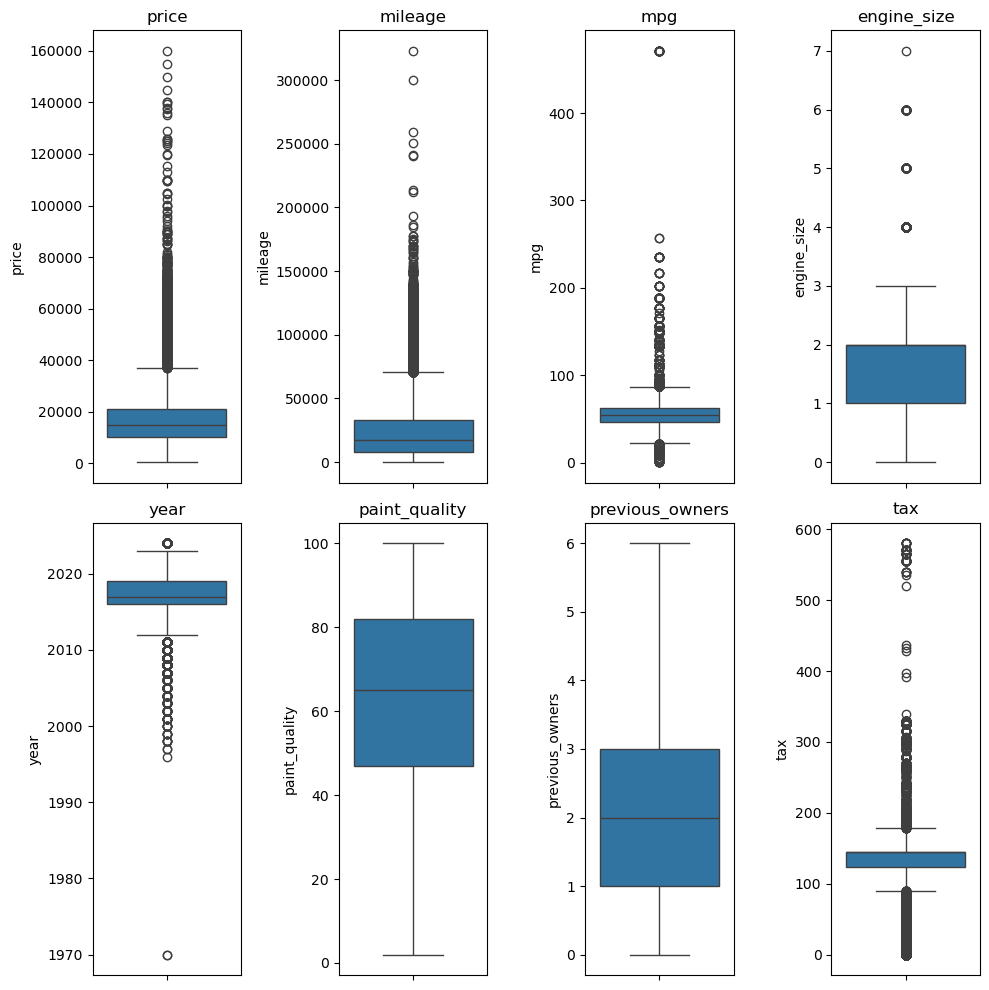

In [142]:
fig, axes = plt.subplots(2, 4, figsize=(10, 10))
axes = axes.flatten()  # makes it a 1D array of length 6

sns.boxplot(df["price"], ax=axes[0])
axes[0].set_title("price")

sns.boxplot(df["mileage"], ax=axes[1])
axes[1].set_title("mileage")

sns.boxplot(df["mpg"], ax=axes[2])
axes[2].set_title("mpg")

sns.boxplot(df["engine_size"], ax=axes[3])
axes[3].set_title("engine_size")

sns.boxplot(df["year"], ax=axes[4])
axes[4].set_title("year")

sns.boxplot(df["paint_quality"], ax=axes[5])
axes[5].set_title("paint_quality")

sns.boxplot(df["previous_owners"], ax=axes[6])
axes[6].set_title("previous_owners")

sns.boxplot(df["tax"], ax=axes[7])
axes[7].set_title("tax")

plt.tight_layout()
plt.show()